# Pivot y Melt

## ¿Qué es Pivot?

- Pivot es una función de Pandas que se utiliza para reorganizar datos.
- Convierte los datos de formato **largo a ancho**.

### Sintaxis de Pivot

- pandas.pivot(`data`, `index`, `columns`, `values`) o df.pivot()
- data: Es el DataFrame original.
- index: Columnas que se mantendrán como índice.
- columns: Columnas que se convertirán en columnas separadas.
- values: Columnas que se utilizarán para llenar los valores de la tabla.

## ¿Qué es Melt?

- Melt es una función de Pandas que se utiliza para reorganizar datos.
- Convierte los datos de formato **ancho a largo**.

### Sintaxis de Melt

- pandas.melt(`data`, `id_vars`, `value_vars`, `var_name`, `value_name`) o df.melt()
- data: Es el DataFrame original.
- id_vars: Columnas que se mantendrán como índice.
- value_vars: Columnas que se convertirán en valores de la tabla.
- var_name: Nombre de la columna que contendrá las variables en value_vars.
- value_name: Nombre de la columna que contendrá los valores de la tabla.

## ¿Cuándo utilizar Pivot y Melt?

- Pivot se utiliza cuando se necesita convertir los datos de formato largo a ancho.
- Melt se utiliza cuando se necesita convertir los datos de formato ancho a largo.

## Conclusión

- Pivot y Melt son herramientas muy útiles para la manipulación de datos.
- Pandas ofrece una gran cantidad de funciones para el análisis y manipulación de datos.

# Ejemplos

In [19]:
import pandas as pd

## Ejemplo de Pivot

In [29]:
# Creamos un DataFrame con los datos originales
df = pd.DataFrame({
    'País': ['USA', 'USA', 'India', 'India'],
    'Año': [2000, 2010, 2000, 2010],
    'Población': [282162411, 308745538, 1006300000, 1205624727],
    'GHJ': [1.2, 1.4, 0.7, 0.9]
}).sort_values(by="Año").reset_index(drop=1) # True = 1, False = 0
df

,País,Año,Población,GHJ
0,USA,2000,282162411,1.2
1,India,2000,1006300000,0.7
2,USA,2010,308745538,1.4
3,India,2010,1205624727,0.9


In [30]:
# Utilizamos la función pivot para reorganizar los datos
df.pivot(index='País', columns='Año', values='Población')

Año,2000,2010
País,,
India,1006300000,1205624727
USA,282162411,308745538


## Ejemplo de Melt

In [35]:
df = pd.DataFrame({
    'País': ['USA', 'USA', 'India', 'India'],
    '2000': [282162411, None, 1006300000, None],
    '2010': [None, 308745538, None, 1205624727]
})
df

,País,2000,2010
0,USA,2.821624e+08,NaN
1,USA,NaN,3.087455e+08
2,India,1.006300e+09,NaN
3,India,NaN,1.205625e+09


In [39]:
df.melt(id_vars='País', var_name='Año', value_name='Población').dropna()

,País,Año,Población
0,USA,2000,2.821624e+08
2,India,2000,1.006300e+09
5,USA,2010,3.087455e+08
7,India,2010,1.205625e+09


## Otro ejemplo

### Melt

In [43]:
df = pd.read_csv("db/poblacion-mundial.csv")
df.head()

,Entity,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,29186000,30117000,31161000,32270000,33371000,34414000,35383000,36296000,37172000,38042000
1,Albania,411734,413026,414323,415624,416929,418237,419550,420868,422189,...,2948000,2929000,2914000,2904000,2896000,2891000,2886000,2884000,2883000,2881000
2,Algeria,2512195,2521203,2530245,2539318,2548424,2557563,2566734,2575939,2585176,...,35977000,36661000,37384000,38140000,38924000,39728000,40551000,41389000,42228000,43053000
3,Andorra,2654,2654,2654,2654,2654,2654,2654,2654,2654,...,84000,84000,82000,81000,79000,78000,77000,77000,77000,77000
4,Angola,1567028,1567028,1567028,1567028,1567028,1567028,1567028,1567028,1567028,...,23356000,24221000,25108000,26016000,26942000,27884000,28842000,29817000,30810000,31825000


In [44]:
df_melt = df.melt(id_vars="Entity", var_name="Año", value_name="Población")
df_melt.head()

,Entity,Año,Población
0,Afghanistan,1801,3280000
1,Albania,1801,411734
2,Algeria,1801,2512195
3,Andorra,1801,2654
4,Angola,1801,1567028


In [46]:
pob_502 = df_melt.query("Entity=='Guatemala'")

In [47]:
import matplotlib.pyplot as plt

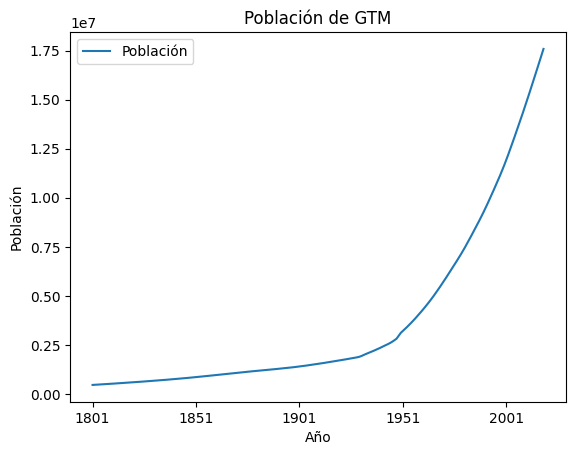

In [58]:
pob_502.plot(
    x="Año",
    y="Población",
    ylabel="Población",
    title="Población de GTM"
)
plt.show()

### Pivot

In [60]:
df = pd.read_csv("db/BigmacPrice.csv")
df

,date,currency_code,name,local_price,dollar_ex,dollar_price
0,2000-04-01,ARS,Argentina,2.50,1,2.50
1,2000-04-01,AUD,Australia,2.59,1,2.59
2,2000-04-01,BRL,Brazil,2.95,1,2.95
3,2000-04-01,GBP,Britain,1.90,1,1.90
4,2000-04-01,CAD,Canada,2.85,1,2.85
...,...,...,...,...,...,...
1941,2022-07-01,AED,United Arab Emirates,18.00,3,6.00
1942,2022-07-01,USD,United States,5.15,1,5.15
1943,2022-07-01,UYU,Uruguay,255.00,41,6.22
1944,2022-07-01,VES,Venezuela,10.00,5,2.00


In [61]:
df.pivot(index="name", columns="date", values="dollar_price")

date,2000-04-01,2001-04-01,2002-04-01,2003-04-01,2004-05-01,2005-06-01,2006-01-01,2006-05-01,2007-01-01,2007-06-01,...,2018-01-01,2018-07-01,2019-01-01,2019-07-09,2020-01-14,2020-07-01,2021-01-01,2021-07-01,2022-01-01,2022-07-01
name,,,,,,,,,,,,,,,,,,,,,
Argentina,2.50,2.50,0.83,2.05,2.18,2.38,1.58,2.33,2.75,2.75,...,4.17,2.78,2.03,2.93,2.85,3.52,3.76,3.96,4.29,4.57
Australia,2.59,3.00,3.00,3.00,3.25,3.25,3.25,3.25,3.45,3.45,...,5.90,6.05,6.10,6.15,6.45,6.55,6.48,6.55,6.40,6.70
Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.40,3.40,3.76,3.81,3.84,3.86,3.88,3.92,3.80,4.35
Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.95,3.95,3.95,3.95,3.95,3.95,3.95,4.50,4.70
Bahrain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.20,1.20,1.40,1.40,1.40,1.50,1.50,1.50,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.67,4.67,4.92,4.92,4.92,4.92,4.92,5.67,6.00
United States,2.24,2.24,2.35,2.46,2.47,2.58,2.67,2.78,2.89,3.00,...,4.61,4.62,4.71,4.71,4.82,4.82,4.89,4.93,5.04,5.15
Uruguay,NaN,NaN,NaN,NaN,1.03,1.83,NaN,1.84,2.39,2.70,...,5.00,4.52,4.38,4.69,4.84,4.40,4.86,5.11,5.43,6.22
